<a href="https://colab.research.google.com/github/patriciamedyna/Classifier_page/blob/main/Fastai_with_tags.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! [ -e /content ] && pip install -Uqq fastai

     |████████████████████████████████| 189 kB 8.6 MB/s 
     |████████████████████████████████| 56 kB 2.9 MB/s 


In [2]:
#hide
!pip install -Uqq fastbook
import fastbook

     |████████████████████████████████| 720 kB 8.0 MB/s 
     |████████████████████████████████| 1.2 MB 48.6 MB/s 
     |████████████████████████████████| 46 kB 4.9 MB/s 
     |████████████████████████████████| 51 kB 392 kB/s 


In [3]:
#hide
from fastbook import *
from IPython.display import display,HTML

In [4]:
from fastai.basics import *
from fastai.text.core import *
from fastai.text.data import *
from fastai.text.models.core import *
from fastai.text.models.awdlstm import *
from fastai.callback.rnn import *
from fastai.callback.progress import *
from fastai.vision import *

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
path = '/content/drive/MyDrive/Colab Notebooks/Tobacco_LSTM/layout/'
#path = '/content/drive/.shortcut-targets-by-id/1R_vnrbg04zsdpye6d-dv190eSUWCL07i/Tobacco_LSTM/layout/'
df_train = pd.read_csv(path + 'train_tags.csv', delimiter=',', error_bad_lines=False)
df_train = df_train.drop(['text'], axis=1)
df_train.head(1)

,binder,docid,class,text_tags
0,Tobacco800,aah97e00-page02_1,FirstPage,"['\n', 'xxQ00_01 xxbob \n', 'xxeob xxQ00_02\n', '\n', 'xxQ00_01 xxbob PHILIP MORRIS\n', 'xxeob xxQ00_02\n', '\n', 'xxQ00_01 xxbob EUROPE MIDDLE EAST AFRICA\n', 'xxeob xxQ00_02\n', '\n', 'xxQ00_01 xxbob RESEARCH AND DEVELOPMENT\n', 'xxeob xxQ01_02\n', '\n', 'xxQ01_02 xxbob Neuchatel, duly 14, 1977\n', 'xxeob xxQ01_03\n', '\n', 'xxQ01_01 xxbob Dr. M.A. Manzelli,\n', 'PHILIP MORRIS INC.,\n', 'Research Center,\n', 'P.O. Box 3 D\n', 'Richmond, Va. 23206\n', 'U.S.A. .\n', 'xxeob xxQ02_01\n', '\n', 'xxQ02_01 xxbob Dear Art,\n', 'xxeob xxQ02_01\n', '\n', 'xxQ03_01 xxbob xxbcet Please proposed pro..."


In [7]:
df_test = pd.read_csv(path + 'test_tags.csv', delimiter=',', error_bad_lines=False)
df_test = df_test.drop(['text'], axis=1)
df_test.head(1)

,binder,docid,class,text_tags
0,Tobacco800,tkj51f00_1,FirstPage,"['\n', 'xxQ00_01 xxbob \n', 'xxeob xxQ00_02\n', '\n', 'xxQ00_01 xxbob h Department\n', 'xxeob xxQ00_02\n', '\n', 'xxQ00_00 xxbob MARCH 26, 1986\n', 'FILE NOTL\n', 'xxeob xxQ00_03\n', '\n', 'xxQ00_02 xxbob \n', 'xxeob xxQ00_03\n', '\n', 'xxQ00_02 xxbob Pare}\n', 'xxeob xxQ00_02\n', '\n', 'xxQ00_00 xxbob COMPONERTS/415_& St\n', 'MATLLARD REACTION “Al! FLAVOR\n', 'xxeob xxQ00_02\n', '\n', 'xxQ00_02 xxbob Fisgert, af Grove AG GALLON Toe lo. 1\n', 'xxeob xxQ00_03\n', '\n', 'xxQ00_00 xxbob the layer of the Mailiare\n', 'Jdentification of flavor components in aqueous\n', 'this communicati..."


In [8]:
#data = df_test.drop(columns='docid')
#df_test = data.drop(columns='binder')
#unsup = df_test.drop(columns='class')
#unsup.head(2)

## Create DataLoader

In [9]:
def get_features(r):

  return r['text']

def get_labels(r):

  return r['class']

In [10]:
df_train.keys()

Index(['binder', 'docid', 'class', 'text_tags'], dtype='object')

In [12]:
dblock_train = DataBlock(
    blocks=(TextBlock.from_df(text_cols=['text_tags', 'class'], seq_len=72), CategoryBlock),
            get_x=get_features, 
            get_y=get_labels)

dloader_train = dblock_train.dataloaders(df_train, bs=64)
dloader_train.show_batch(max_n=2)

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


,text,category
0,"xxbos xxfld 1 [ ' \n ' , ' xxq00_00 xxbob \n ' , ' xxeob xxq00_00 \n ' , ' \n ' , ' xxq00_00 xxbob xxbcet - \n ' , ' xxecet \n ' , ' xxunk \n ' , ' xxeob xxq00_00 \n ' , ' \n ' , ' xxq00_00 xxbob \n ' , ' xxeob xxq00_00 \n ' , ' \n ' , ' xxq00_00 xxbob \n ' , ' xxeob xxq00_01 \n ' , ' \n ' , ' xxq00_00 xxbob xxbcet xxmaj the | end xxmaj xxunk t xxmaj content xxmaj of xxmaj one xxmaj hundred \n ' , ' xxecet \n ' , ' xxeob xxq00_01 \n ' , ' \n ' , ' xxq00_00 xxbob \n ' , ' xxeob xxq00_01 \n ' , ' \n ' , ' xxq00_00 xxbob xxbcet \n ' , ' xxecet \n ' , '",NextPage
1,"xxbos xxfld 1 [ ' \n ' , ' xxq00_00 xxbob xxup lo xxmaj absorbance xxmaj unit xxmaj full xxmaj seale \n ' , ' at 550 xxmaj dm \n ' , ' "" po xxup la xxmaj xxunk xxunk xxunk xxmaj abi xxup xxunk \ ' xxup ant xxrep 3 a xxmaj dy \n ' , ' xxeob xxq00_01 \n ' , ' \n ' , ' xxq00_00 xxbob [ ge \n ' , ' xxbcet om xxmaj xxunk ia xxunk xxmaj xxunk ni \n ' , ' xxecet \n ' , ' pre xxunk xxmaj tet xxup tm ce xxup ct xxup tt xxup tt nat \n ' , ' he s xxmaj fee et xxrep 3 t xxrep 3 t xxrep 3 t xxup tt at en \n ' , ' ei i \n ' , ' foes xxunk xxup ce at xxunk xxup tt xxup tt",NextPage


## Classification Model

In [13]:
from fastai.text.all import *

In [14]:
learn = text_classifier_learner(dloader_train, 
                                AWD_LSTM, 
                                drop_mult=0.5, 
                                metrics=[error_rate, accuracy, Perplexity()]).to_fp16()

In [15]:
learn.fine_tune(4, 1e-2)

epoch,train_loss,valid_loss,error_rate,accuracy,perplexity,time
0,0.735901,0.611477,0.378641,0.621359,1.843152,00:07


epoch,train_loss,valid_loss,error_rate,accuracy,perplexity,time
0,0.542552,0.502737,0.213592,0.786408,1.653239,00:15
1,0.496141,0.446353,0.242718,0.757282,1.562603,00:15
2,0.464021,0.339339,0.135922,0.864078,1.404020,00:14
3,0.424287,0.283856,0.116505,0.883495,1.328242,00:15


In [16]:
learn.show_results()

,text,category,category_
0,"xxbos xxfld 1 [ ' \n ' , ' xxq00_00 xxbob xxbcet 2202 \n ' , ' xxecet \n ' , ' xxeob xxq00_00 \n ' , ' \n ' , ' xxq00_00 xxbob \n ' , ' xxeob xxq00_01 \n ' , ' \n ' , ' xxq00_00 xxbob ¢ \n ' , ' xxeob xxq00_00 \n ' , ' \n ' , ' xxq00_00 xxbob { b ) xxmaj whether each applicant has \n ' , ' xxunk leaders of that group . \n ' , ' 2 xxmaj to determine with respect to the \n ' , ' » efforts of xxup po to ascertain the needs of \n ' , ' its proposed service area : \n ' , ' ( a ) xxmaj whether the xxunk ! xxunk \n ' , ' leaders of agriculture and ! xxunk in \n ' , ' xxunk ,",NextPage,FirstPage
1,"xxbos xxfld 1 [ ' \n ' , ' xxq00_00 xxbob “ wlrk rightfax xxmaj server 5 / 28 / 99 \n ' , ' xxeob xxq00_01 \n ' , ' \n ' , ' xxq00_01 xxbob 5:12 : xxup page xxunk / 6 \n ' , ' xxeob xxq00_02 \n ' , ' \n ' , ' xxq00_00 xxbob -1 : xxunk xxmaj wilson company : lorillard xxmaj tobacco xxmaj company \n ' , ' xxeob xxq00_02 \n ' , ' \n ' , ' xxq00_00 xxbob xxup martin xxup xxunk \n ' , ' xxunk 4 . xxup xxunk \n ' , ' theodore xxup gewertz \n ' , ' xxunk xxup w. xxup nussbaum \n ' , ' xxunk xxup d. xxup katcher \n ' , ' douglas 5 . xxup xxunk \n ' , ' steven xxup m , xxup barna \n ' , ' chaim",FirstPage,FirstPage
2,"xxbos xxfld 1 [ ' \n ' , ' xxq00_00 xxbob xxbcet xxup g2 - xxunk \n ' , ' xxecet \n ' , ' xxeob xxq00_00 \n ' , ' \n ' , ' xxq00_00 xxbob \n ' , ' xxeob xxq00_00 \n ' , ' \n ' , ' xxq00_00 xxbob . \n ' , ' xxeob xxq00_00 \n ' , ' \n ' , ' xxq01_00 xxbob xxup martin xxup xxunk \n ' , ' xxunk xxup m. xxup wachtell \n ' , ' xxunk xxup xxunk \n ' , ' xxbcet xxup xxunk xxmaj ww . xxup xxunk \n ' , ' xxecet \n ' , ' richard xxup d , xxup xxunk \n ' , ' xxunk 6 xxup xxunk \n ' , ' xxunk xxup xxunk , xxup barna \n ' , ' xxunk xxup j , xxup xxunk \n ' , ' peter",FirstPage,FirstPage
3,"xxbos xxfld 1 [ ' \n ' , ' xxq00_00 xxbob ee . \n ' , ' xxeob xxq00_00 \n ' , ' \n ' , ' xxq00_00 xxbob xxmaj xxunk \n ' , ' xxbcet xxup xxunk \n ' , ' xxecet \n ' , ' xxbcet xxup herbert xxup m. xxup wachtell \n ' , ' xxecet \n ' , ' xxbcet xxup theodore xxup gewertz \n ' , ' xxecet \n ' , ' xxbcet xxup bernard xxup w. xxup nussbaum \n ' , ' xxecet \n ' , ' xxbcet xxup richard © . xxup katcher \n ' , ' xxecet \n ' , ' douglas 5 . xxup liebhafsky \n ' , ' steven xxup m. xxup barna \n ' , ' xxbcet xxup chaim xxup j. xxup fortgang \n ' , ' xxecet \n ' , ' xxbcet xxup peter xxup c. xxup canellos",FirstPage,FirstPage
4,"xxbos xxfld 1 [ ' \n ' , ' xxq00_00 xxbob xxup xxunk \n ' , ' xxeob xxq00_00 \n ' , ' \n ' , ' xxq00_00 xxbob xxup wlrk rightfax xxmaj server xxunk / 00 xxunk : xxup page xxunk / 68 xxunk \n ' , ' e @ \n ' , ' company : \n ' , ' _ \n ' , ' xxeob xxq00_02 \n ' , ' \n ' , ' xxq00_01 xxbob xxup wachtell , xxup lipton , xxup rosen & xxup katz \n ' , ' xxeob xxq00_02 \n ' , ' \n ' , ' xxq00_00 xxbob xxup martin xxup lipton xxup barbara xxup xxunk xxup xxunk xxup ehrenkranz \n ' , ' herbert xxup m , xxup wachtell xxup steven a xxup xxunk xxup xxunk xxup s2nd xxup street xxup highael xxup w , xxup xxunk \n ' , ' xxunk",FirstPage,FirstPage
5,"xxbos xxfld 1 [ ' \n ' , ' xxq03_00 xxbob \n ' , ' xxeob xxq03_00 \n ' , ' \n ' , ' xxq03_00 xxbob \n ' , ' xxeob xxq04_00 \n ' , ' \n ' , ' xxq04_00 xxbob \n ' , ' xxeob xxq04_00 \n ' , ' \n ' , ' xxq03_00 xxbob \n ' , ' xxeob xxq03_01 \n ' , ' \n ' , ' xxq05_00 xxbob \n ' , ' xxeob xxq05_01 \n ' , ' \n ' , ' xxq00_00 xxbob \n ' , ' xxeob xxq01_03 \n ' , ' \n ' , ' xxq01_01 xxbob \n ' , ' \n ' , ' xxeob xxq01_03 \n ' , ' \n ' , ' xxq01_01 xxbob xxmaj the \n ' , ' public | \n ' , ' sector \n ' , ' 22 xxup battery xxup st -",FirstPage,NextPage
6,"xxbos xxfld 1 [ ' \n ' , ' xxq00_03 xxbob xxunk \n ' , ' xxunk \n ' , ' xxeob xxq00_03 \n ' , ' \n ' , ' xxq02_00 xxbob \n ' , ' xxeob xxq03_00 \n ' , ' \n ' , ' xxq02_00 xxbob \n ' , ' xxeob xxq02_00 \n ' , ' \n ' , ' xxq01_02 xxbob xxup xxunk xxup xxunk xxmaj xxunk xxmaj xxunk \n ' , ' “ wd “ te “ td “ 12 , \n ' , ' xxeob xxq02_02 \n ' , ' \n ' , ' xx

In [17]:
learn.save('text_classification_tags')

Path('models/text_classification_tags.pth')

In [18]:
# load model
learn = learn.load('text_classification_tags')

In [19]:
learn.unfreeze()
learn.fit_one_cycle(10, 1e-2)

epoch,train_loss,valid_loss,error_rate,accuracy,perplexity,time
0,0.362568,0.385341,0.169903,0.830097,1.470115,00:15
1,0.245164,1.120266,0.495146,0.504854,3.065670,00:15
2,0.178590,0.066348,0.063107,0.936893,1.068599,00:15
3,0.157186,10.662621,0.577670,0.422330,42728.503906,00:14
4,0.348876,0.683353,0.422330,0.577670,1.980507,00:15
5,0.300838,0.088298,0.048544,0.951456,1.092314,00:15
6,0.247081,0.183774,0.053398,0.946602,1.201744,00:15
7,0.203009,0.072157,0.033981,0.966019,1.074824,00:15
8,0.169215,0.080983,0.038835,0.961165,1.084352,00:15
9,0.142676,0.108478,0.067961,0.932039,1.114581,00:15


SuggestedLRs(valley=7.585775892948732e-05)

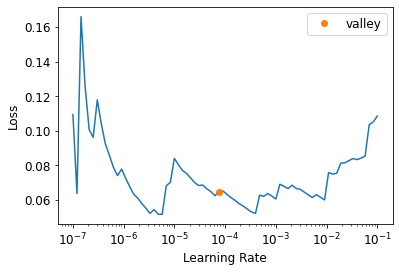

In [20]:
learn.unfreeze()
learn.lr_find()

In [21]:
learn_lm = text_classifier_learner(dloader_train, AWD_LSTM, drop_mult=0.5,metrics=[error_rate, accuracy, Perplexity()]).to_fp16()

In [22]:
learn_lm.fine_tune(10, 1e-2)

epoch,train_loss,valid_loss,error_rate,accuracy,perplexity,time
0,0.714983,0.632174,0.364078,0.635922,1.881696,00:07


epoch,train_loss,valid_loss,error_rate,accuracy,perplexity,time
0,0.543873,0.531171,0.330097,0.669903,1.700923,00:15
1,0.520568,0.475537,0.252427,0.747573,1.608878,00:15
2,0.490034,0.307435,0.087379,0.912621,1.359933,00:15
3,0.460816,0.797728,0.388350,0.611650,2.220491,00:14
4,0.429420,0.261871,0.063107,0.936893,1.299358,00:15
5,0.392467,0.220177,0.053398,0.946602,1.246298,00:15
6,0.349355,0.258568,0.087379,0.912621,1.295074,00:15
7,0.318924,0.188354,0.063107,0.936893,1.207261,00:15
8,0.282858,0.201203,0.067961,0.932039,1.222872,00:15
9,0.258829,0.190532,0.058252,0.941748,1.209894,00:15


## Validation

In [28]:
# create dataloader of test
dblock_test_tags = DataBlock(
    blocks=(TextBlock.from_df('text_tags', seq_len=72), CategoryBlock),
            get_x=get_features, 
            get_y=get_labels)

dloader_test = dblock_test_tags.dataloaders(df_test, bs=64)

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


In [29]:
test_dl = dloader_test.test_dl(df_test['text_tags'])
preds = learn.get_preds(dl=test_dl, with_decoded=True)

In [25]:
len(preds)

3

In [30]:
learn.validate()

(#4) [0.10847843438386917,0.06796116381883621,0.9320388436317444,1.1145808696746826]

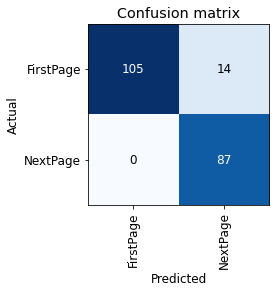

In [31]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()